In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
dff = pd.read_csv(r"C:\Users\hp\Documents\rg\data\Join.csv")

In [275]:
dff.head()

,fisrt_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,name,latitude,longitude
0,Gutierrez,Molly,F,32.028816,6.018478,36.577306,5,New Orleans LA,29.9500,-90.0667
1,Hardwick,Stephen,M,40.320902,5.532445,30.165072,9,Charleston SC,32.7833,-79.9333
2,Delgado,Chester,M,48.822047,4.389973,83.807798,10,Savannah GA,32.0167,-81.1167
3,Simon,Irene,F,44.599357,3.081736,70.020165,2,Chicago IL,41.8369,-87.6847
4,Delvalle,Edward,M,35.697876,3.619091,0.000000,4,Los Angeles CA,34.0500,-118.2500


In [276]:
dff.shape

(8336, 10)

In [277]:
df = dff.drop('distribution_centers_id',axis=1)
df.head()

,fisrt_name,last_name,gender,age,length_service,absent_hours,name,latitude,longitude
0,Gutierrez,Molly,F,32.028816,6.018478,36.577306,New Orleans LA,29.9500,-90.0667
1,Hardwick,Stephen,M,40.320902,5.532445,30.165072,Charleston SC,32.7833,-79.9333
2,Delgado,Chester,M,48.822047,4.389973,83.807798,Savannah GA,32.0167,-81.1167
3,Simon,Irene,F,44.599357,3.081736,70.020165,Chicago IL,41.8369,-87.6847
4,Delvalle,Edward,M,35.697876,3.619091,0.000000,Los Angeles CA,34.0500,-118.2500


In [278]:
df['age']=df['age'].astype('int')

In [279]:
df.columns

Index(['fisrt_name', 'last_name', 'gender', 'age', 'length_service',
       'absent_hours', 'name', 'latitude', 'longitude'],
      dtype='object')

In [280]:
###Categorical Variables
cols = ['gender','name']

In [281]:
###label encoding
from sklearn.preprocessing import LabelEncoder
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [282]:
df.head()

,fisrt_name,last_name,gender,age,length_service,absent_hours,name,latitude,longitude
0,Gutierrez,Molly,0,32,6.018478,36.577306,6,29.9500,-90.0667
1,Hardwick,Stephen,1,40,5.532445,30.165072,0,32.7833,-79.9333
2,Delgado,Chester,1,48,4.389973,83.807798,9,32.0167,-81.1167
3,Simon,Irene,0,44,3.081736,70.020165,1,41.8369,-87.6847
4,Delvalle,Edward,1,35,3.619091,0.000000,3,34.0500,-118.2500


In [283]:
# IQR Method to remove outliers
q1, q3 = np.percentile(df['age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [307]:
df.describe()

,gender,age,length_service,absent_hours,name,latitude,longitude
count,8259.000000,8259.000000,8259.000000,8259.000000,8259.000000,8259.000000,8259.000000
mean,0.506599,41.542681,4.784149,61.088391,4.484562,34.675679,-87.963883
std,0.499987,9.592911,2.470414,48.263293,2.867646,4.337000,12.051902
min,0.000000,16.000000,0.012098,0.000000,0.000000,29.760400,-118.250000
25%,0.000000,35.000000,3.577259,19.667232,2.000000,30.694400,-90.066700
50%,1.000000,42.000000,4.598178,56.175784,4.000000,32.783300,-88.043100
75%,1.000000,48.000000,5.623032,94.030097,7.000000,39.950000,-79.933300
max,1.000000,67.000000,43.735239,252.193535,9.000000,41.836900,-73.783400


In [284]:
df.groupby('fisrt_name')['gender','age','length_service','absent_hours'].sum()

C:\Users\hp\AppData\Local\Temp/ipykernel_14056/3901414515.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('fisrt_name')['gender','age','length_service','absent_hours'].sum()


,gender,age,length_service,absent_hours
fisrt_name,,,,
Aaron,1,43,5.502564,95.416804
Abadie,0,41,2.433408,23.474656
Abbas,0,51,4.164912,138.834747
Abbate,0,39,1.766600,51.527000
Abbott,5,207,23.414446,327.149793
...,...,...,...,...
Ziemba,0,40,4.526874,74.190142
Zinn,1,50,3.678007,66.643098
Zorn,0,31,4.071733,0.000000


In [285]:
df.shape

(8259, 9)

# Regresi Linear Sederhana

Fit the model using lm fit

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
z = df[['gender','age','length_service']]
y = df['absent_hours']

# Splitting Data

In [317]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5781, 1) (5781,)
(2478, 1) (2478,)


In [ ]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
model

In [323]:
# Fit the model using lm fit

In [324]:
lm.intercept_

-112.84942072294888

In [326]:
lm.coef_

array([4.18917885])

Oleh karena itu Persamaan Regresi Linier Sederhana adalah
absent hours = -112.431 + 4.176*age

# Prediction of test set

In [338]:
Y_pred = lm2.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(Y_pred))

Prediction for test set: [-24.87666491  46.3393755   84.04198513 ...  17.01512356  96.60952168
  63.09609089]


In [339]:
lm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': Y_pred})
lm_diff

,Actual value,Predicted value
4421,0.000000,-24.876665
1850,80.004425,46.339376
644,73.008409,84.041985
7892,187.506533,109.177058
7275,35.446375,54.717733
...,...,...
6807,98.948194,79.852806
7314,0.000000,0.258408
4191,25.599744,17.015124
5533,53.185712,96.609522


d:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absent_hours', ylabel='Density'>

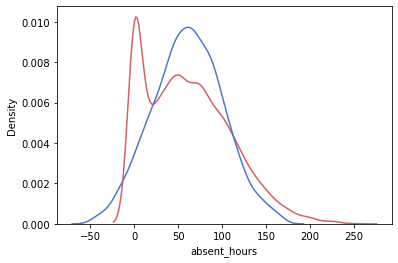

In [337]:
ax1 = sns.distplot(df['absent_hours'], hist=False, color='r', label = 'Aktual Value')
sns.distplot(Y_pred, hist=False, color='b', label = 'Fitted Values', ax=ax1)

In [327]:
lm.score(x,y)

0.6892382998931327

# EVALUASI MODEL

In [340]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, yhat)
meanSqErr = metrics.mean_squared_error(y, yhat)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, yhat))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 21.141470897602506
Mean Square Error: 723.7836987932405
Root Mean Square Error: 26.903228408375835


# Regresi Linear Berganda

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
z = df[['gender','age','length_service']]
y = df['absent_hours']

Splitting the data into training and testing subsets

In [293]:
z_train, z_test, b_train, b_test = train_test_split(z,y, test_size=0.3, random_state=0)
print(z_train.shape, b_train.shape)
print(z_test.shape, b_test.shape)

(5781, 3) (5781,)
(2478, 3) (2478,)


z: variabel independen

y: variabel terikat

z_train, y_train: bagian dari data yang tersedia sebagai set pelatihan

z_test, y_test: bagian dari data yang tersedia sebagai set pengujian

test_size: persentase data untuk pengujian (30% dalam kasus ini)

In [294]:
lm2 = LinearRegression()
model2 = lm2.fit(z_train, b_train)
model2

LinearRegression()

In [295]:
lm2.intercept_

-100.121716329832

In [296]:
lm2.coef_

array([-16.51243773,   4.26166838,  -1.54778862])

Oleh karena itu Persamaan Regresi Linear Berganda adalah 
absent hours = -95.639 - 16.818*gender + 4.207*age - 1.875*length service 

Sekarang model sudah disiapkan, mari kita prediksi absent hours menggunakan metode predict () pada subset pengujian.

In [297]:
y_pred = lm2.predict(z_test)[0:5]
y_pred

array([-34.02894827,  52.93762529,  75.99294823, 118.48078568,
        47.30304953])

In [298]:
lm2.score(z_test,b_test)

0.7259575058538832

Nilai R kuadrat mendekati satu, sehingga dapat dikatakan model sudah sesuai.
Dalam hal ini, 71% variasi dalam absent hours dijelaskan oleh variabel bebas.

# Plot distribusi menghitung nilai prediksi vs nilai sebenarnya.

d:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absent_hours', ylabel='Density'>

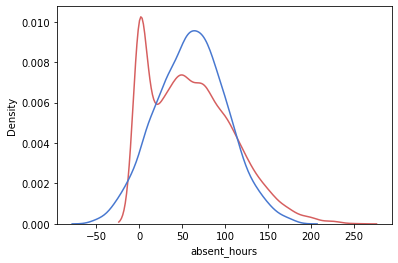

In [336]:
ax1 = sns.distplot(df['absent_hours'], hist=False, color='r', label = 'Aktual Value')
sns.distplot(y_pred, hist=False, color='b', label = 'Fitted Values', ax=ax1)

In [301]:
#Prediction of test set
y_pred = lm2.predict(z_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [-34.02894827  52.93762529  75.99294823 ...  23.87127444 107.18960233
  49.45041027]


In [302]:
lm2_diff = pd.DataFrame({'Actual value': b_test, 'Predicted value': y_pred})
lm2_diff

,Actual value,Predicted value
4421,0.000000,-34.028948
1850,80.004425,52.937625
644,73.008409,75.992948
7892,187.506533,118.480786
7275,35.446375,47.303050
...,...,...
6807,98.948194,74.124969
7314,0.000000,-8.421972
4191,25.599744,23.871274
5533,53.185712,107.189602


# Model Evaluation

In [305]:

meanAbErr = metrics.mean_absolute_error(b_test, y_pred)
meanSqErr = metrics.mean_squared_error(b_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(b_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 19.87228442076841
Mean Square Error: 623.9508919314668
Root Mean Square Error: 24.979009026209724
